# Procesamiento digital de señales de Electromiograma

## 1. Introducción

### 1.1 EMG 

Un electromiograma permite registrar la actividad eléctrica que se produce en el músculo esquelético durante su contracción. Su realización permite evaluar la salud de los musculos y células nerviosas que los controlan. Por lo tanto, este tipo de pruebas pueden revelar disfunción nerviosa o del músculo.

La contracción muscular inicia ocn la llegada del potencial de acción desde neuronas motoras, que al alcanzar la unión neuromuscular, desencadena una serie de eventos eléctricos y mecánicos en la fibra muscular. Esta actividad eléctrica puede captarse y medirse mediante una electromiografía, que permite analizar la dinámica de activación neuromuscular.

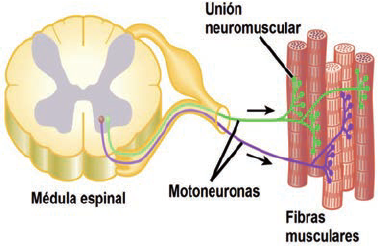

*Figura 1 Representación de una unidad motora*

En estado de reposo, la membrana de tanto las células nerviosas como las musculares posee una polaridad, que se atribuye a la diferencia de concentraciones de iones entre el medio extra e intracelular. Al recibir un estímulo nervioso, la fibra muscular se despolariza y la señal se propaga a lo largo de su membrana, lo que produce una contracción. Dicha despolarización implica un movimiento de corrientes iónicas, que genera un campo eléctrico local registrable por un electrodo.

Una señal de EMG representa una superposición de potenciales de acción de unidades motoras que, si bien parece aleatoria, puede ser modelada como un proceso de impulsos que producen una respuesta.
Esto se puede describir mediante el siguiente modelo matemático:

$ x(n) = \sum_{r=0}^{N-1} h(r)*e(n-r) + w(n) $

Donde:
$x(n)$ es la señal total del EMG. $e(n)$ representa los impulsos neuronales, disparos de una motoneurona. $h(r)$ es la respuesta del músculo al impulso (MUAP). $w(n)$ es el ruido.
No obstante, la señal de EMG presenta diversos desafíos en cuanto a su adquisición, entre los cuales se encuentran el ruido eléctrico, las interferencias electromagnéticas, artefactos de movimiento, variabilidad fisiológica de la señal. A su vez, existen factores fisiológicos que afectan la forma y amplitud, siendo estos la ubicación de los electrodos, el tipo de fibra muscular, la cantidad de unidades motoras activas, entre otros.

La adquisición de señales electromiográficas y su análisis permite estudiar el funcionamiento del sistema neuromuscular, así como también detectar posibles patologías. 

### 1.2  EMG normal

En un EMG normal, los músculos y nervios funcionan correctamente, por lo tanto el músculo en reposo no debe mostrar actividad eléctrica significativa. Si se produce una contracción débil, se da un reclutamiento de unidades motoras, la amplitud de la onda representa el número de fibras musculares en la unidad motora. A medida que se incrementa la intesidad de la contracción, aumentan tanto la frecuencia de impulsos que arrivan a la unidad motora como el numero de unidades motoras que se contraen, esto produce una señal con mucho interferencia y superposición, esto se debe a muchas unidades motoras que se contraen en simultáneo.

### 1.3 Patologías
Una unidad motora se compone de una neurona que inerva a fibras musculares. Por lo que pueden detectarse patologías relacionadas al mal funcionamiento de la neurona o del músculo.

En un paciente con neuropatía, el número de unidades motoras es menor al normal debido a daño en motoneuronas o sus axones.  Esta patología resulta en una disminución del número de potenciales de acción registrados, no obstante, las unidades motoras que sobreviven suelen sufrir una hipertrofia compensatoria. Esto implica que se generan MUAPs de mayor amplitud y duración en comparación a lo esperable para un paciente sano. A su vez, en este tipo de señales se suelen observar contracciones involuntarias en reposo. 

En un paciente con miopatía, es el músculo el que deteriora su capacidad contráctil. Si bien se produce un control nervioso correcto, las unidades motoras contienen menos fibras musculares funcionales. Estas condiciones se traducen en una señal con MUAPs de baja amplitud y corta duración. Es esperable ver menor energía y actividad menos densa incluso cuando el paciente contrae voluntariamente. En cuanto a la frecuencia de actividad, puede llegar a ser más alta para compensar la debilidad muscular.
 
El objetivo del presente trabajo es explorar diversos métodos y técnicas de procesamiento digital de señales fisiológicas reales. Para lograr caracterizar y comparar señales musculares de sujetos sanos y con patologías.




## 2. Metodología

### 2.1 Señales

El presente trabajo analiza señales de EMG registradas en el músculo tibial anterior de tres sujetos con diferentes condiciones neuromusculares. Los datos se recolectaron a través de un electrodo concéntrico con aguja de 25 mm insertado en el músculo. A cada uno de los pacientes se le pidió realizar una dorsiflexión suave del pie contra una resistencia, posicionando el electrodo hasta identificar potenciales de unidades motoras con tiempo de ascenso rápido. Luego, se procedió el muestreo durante varios segundos de señal, antes de retirar la aguja, los sujetos relajaron el músculo.
Las señales fueron inicialmente adquiridas a 50kHz y remuestreadas a 4kHz. Se aplicaron además dos filtros pasa altos de 20 Hz y un pasa bajos de 5kHz. Las tres señales adquiridas corresponden a:
1. Un hombre de 44 años sin antecedentes de enfermedad neuromuscular.
2. Hombre de 62 años con dolor lumbar crónico y neuropatía por radiculopatía L5 derecha.
3. Hombre de 57 años con miopatía secundaria a polimiositis crónica, medicada con esteroides y bajas dosis de metotrexato.

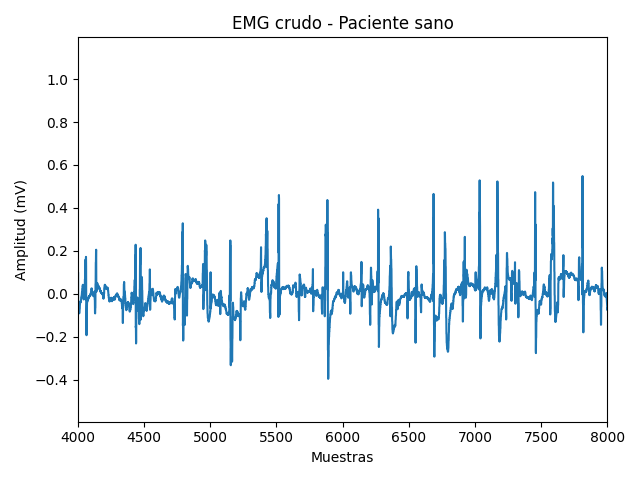
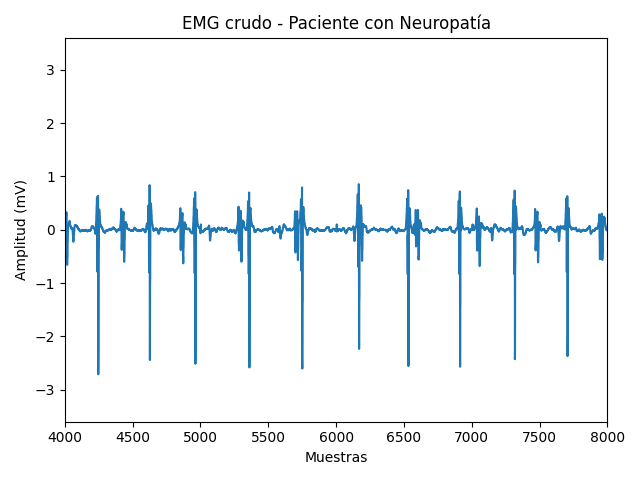
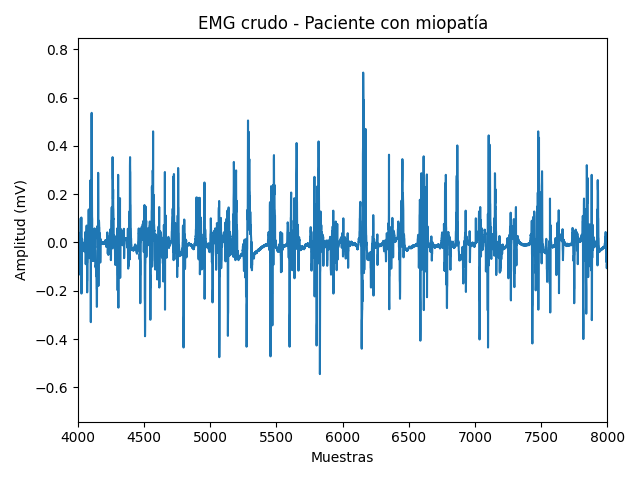


### 2.2 Preprocesamiento

#### 2.2.1 Filtrado Lineal

Si bien las señales ya pasaron por etapas de prefiltrado analógico, es conveniente aplicar filtros digitales para refinar el acondicionamiento de las señales y limitar los rangos de frecuencias a un rango fisiológicamente relevante.

La actividad eléctrica muscular se encuentra mayormento concentrada entre 20 y 500 Hz. Las frecuencias más bajas pueden deberse a movimientos, mientras que las superiores suelen representar interferencia o ruido eléctrico. El acondicionamiento adicional por medio de la implementación de filtros digitales resulta beneficioso, pues mejora la relación señal a ruido y permite refinar las bandas de paso y rechazo con mayor precisión.

##### Plantilla de diseño 

##### - Filtros Pasa Bandas
Para filtrar las señales de EMG, se diseñaron dos filtros de tipo IIR recursivos pasa banda. Ambos poseen una respuesta suave, que atenúa las componentes fuera del rango de 20 a 480 Hz. Se estableció una banda de rechazo por debajo de 10 Hz para suprimir artefatos debido al movimiento y una banda de rechazo en 600 Hz para eliminar componentes no fisiológicas. La ondulación máxima permitida en la banda pasante fue de 0.5 dB, y la atenuación mínima de 40dB en las bandas de rechazo. Los parámetros aseguran una buena fidelidad sin introducir distorsiones en la información relevante de la señal.

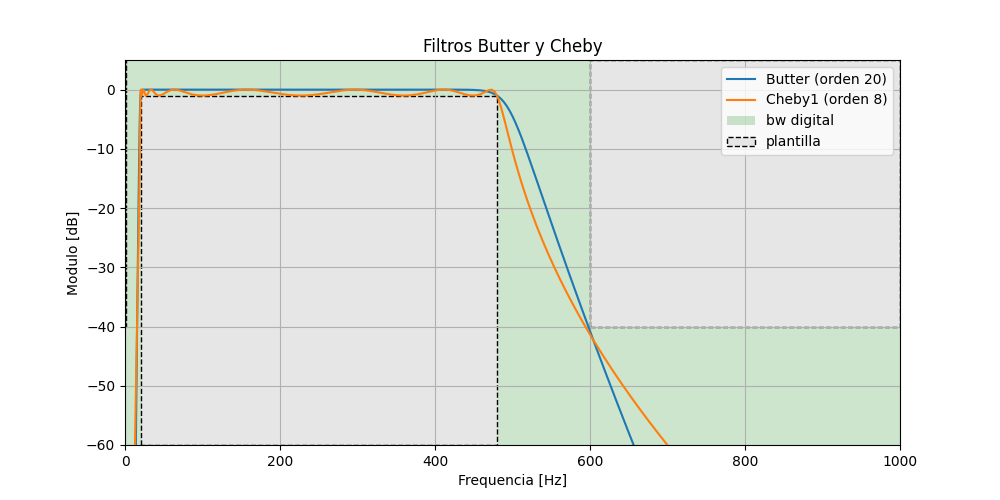

Se probaron dos diseños posibles, un filtro de tipo Butterwoth y un Chebyshev tipo I. Si bien el segundo cumple con los requerimientos con un orden menor, introduce ripple en la banda pasante, por lo que se concluyó que el filtro de Butterworth (al costo de un mayor esfuerzo computacional) es una mejor opción para filtrar las señales ya que su respuesta monótona en la banda de paso introduce ondulaciones en la señal en el rango frecuencial de interés. 

##### - Filtros Notch
Además, para eliminar la interferencia eléctrica, se diseñó un filtro notch con corte en 60 Hz. Se probó la implementación de múltiples etapas en cascada para alcanzar órdenes superiores. 

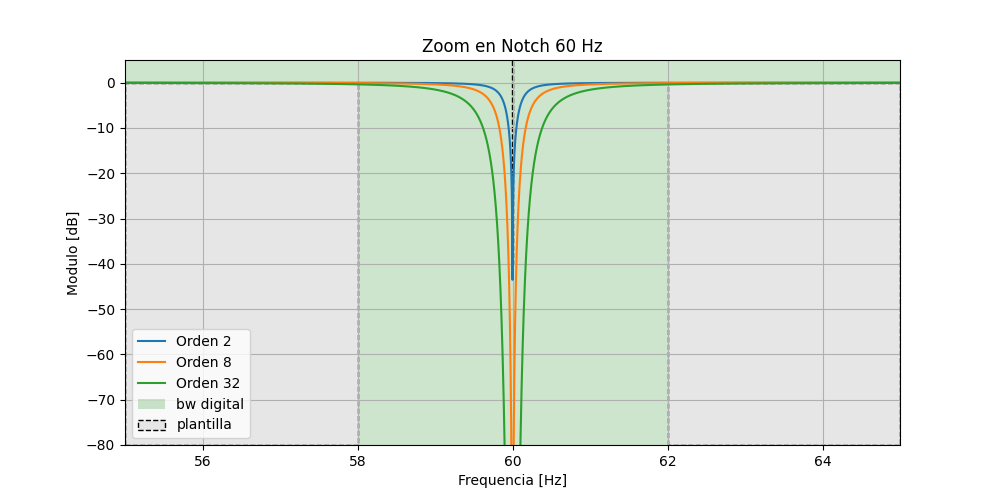

La plantilla permite ver que un orden 2  logra cumplir con los requerimientos de atenuación y transiciona en forma más abrupta.

##### - Filtros Concatenados

A continuación, se concatenaron las secciones SOS del filtro pasabanda Butterworth y el filtro notch de orden 2.

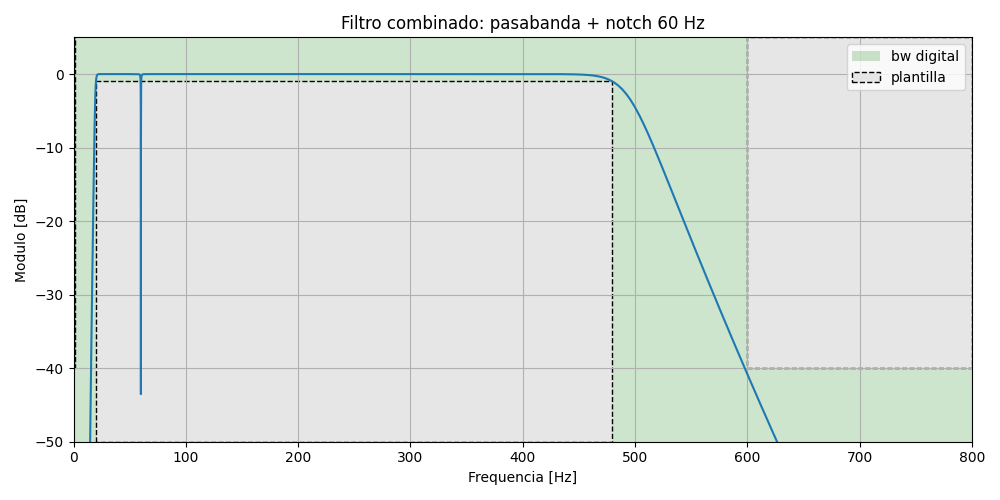

Como se logra apreciar en la figura, el filtro diseñado atenúa las regiones que están por fuera del rango de frecuencias de interés a -40dB. Asimismo, la elección del pasabandas butter logra una transferencia sin rizado en la banda pasante. 


##### Aplicación del Filtro Diseñado

Para implementar el filtro, se utiliza la función sosfiltfilt, que aplica el filtro diseñado dos veces. Primero hacia adelante, y luego hacia atrás. La técnica de filtrado bidireccional compensa la distorsión de fase introducida. Como resultado, el retardo es nulo y la señal no se distorsiona. 
Tras diseñar e implementar el filtro digital, se graficó la señal original y filtrada en intervalos de mayor y menor ruido, observándose que la señal filtrada conserva la forma de onda original relativamente bien, pero queda removida su línea de base, a su vez, se ve una reducción en la amplitud de los picos. Por otro lado, se introudce un leve rizado en áreas específicas.


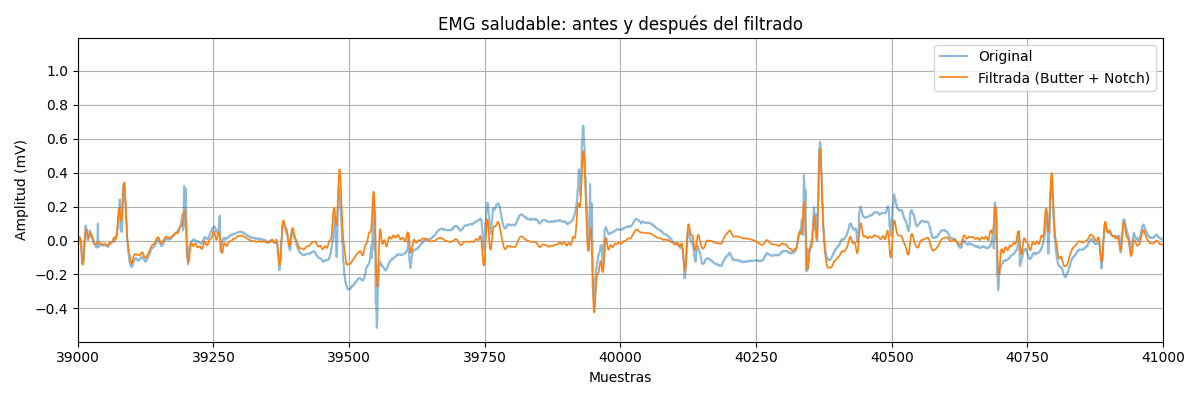
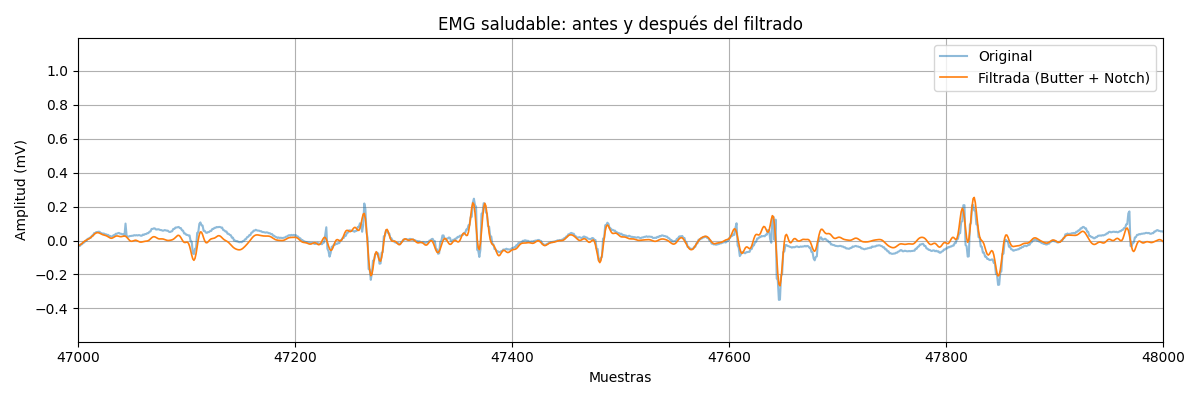
En cuanto a los resultados sobre la señal saludable, se aprecia que en la región ruidosa, la señal filtrada queda removida de su línea de base, sin embargo, el filtro diseñado introduce rizado no deseado en ciertas áreas, lo cual no es deseable para el análisis de señales fisiológicas, pues se distorsiona la forma original de la señal. En adición, se observa una reducción de la amplitud de los picos.

Para la señal con nueuropatía, la forma de onda original se conserva relativamente bien. El filtro remueve la línea de base, elimina oscilaciones muy rápidas y reduce la amplitud de picos abruptos.

Al comparar la señal original con la filtrada, se observa una señal más limpia, se atenúan las oscilaciones abruptas y se observa una ligera disminución de la amplitud. 

#### 2.2.1 Filtrado no Lineal




### 2.3 Caracterización temporal

### 2.4 Análisis espectral

## 3. Discusión

## 4. Conclusiones

## 5. Bibliografía
[1] Raez MB, Hussain MS, Mohd-Yasin F. Techniques of EMG signal analysis: detection, processing, classification and applications. Biol Proced Online. 2006;8:11-35. doi: 10.1251/bpo115. Epub 2006 Mar 23. Erratum in: Biol Proced Online. 2006;8:163. doi: 10.1251/bpo124. PMID: 16799694; PMCID: PMC1455479.

[2] De Luca, C. J. (2002). Surface Electromyography: Detection and Recording. Delsys Inc.


Raez MB, Hussain MS, Mohd-Yasin F. Techniques of EMG signal analysis: detection, processing, classification and applications. Biol Proced Online. 2006;8:11-35. doi: 10.1251/bpo115. Epub 2006 Mar 23. Erratum in: Biol Proced Online. 2006;8:163. doi: 10.1251/bpo124. PMID: 16799694; PMCID: PMC1455479.

http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S1692-17982013000100009

